In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import time
from IPython.display import display, clear_output

In [71]:
class Vehicle():
    '''General vehicle class'''
    
    def __init__(self, pos=(-10,0), vel=(.1,0), dest='right', risky=False, random=False):
        '''Defines the vehicle'''
        if random:
            x = rd.random()
            if x <.25:
                self.position = (-.5,10)
            elif x <.50:
                self.position = (10,.5)
            elif x <.75:
                self.position = (.5,-10)
            else:
                self.position = (-10,-.5)
        else:
            self.position = pos
        self.velocity = vel
        self.destination = dest
        self.risky = risky

    def move(self):
        '''Updates position based on velocity'''
        self.position = (self.position[0]+self.velocity[0], self.position[1]+self.velocity[1])
    
    def set_pos(self, pos):
        '''Sets position of vehicle'''
        self.position = pos
        
    def get_pos(self):
        '''Gets position of vehicle'''
        return self.position
    
    def set_vel(self, vel):
        '''Sets velocity of vehicle'''
        self.velocity = vel
        
    def get_vel(self):
        '''Gets velocity of vehicle'''
        return self.velocity

In [69]:
class Intersection():
    '''General intersection class'''
    
    def __init__(self, n):
        '''Defines the intersection'''
        self.vehicles = []
        for i in range(n):
            self.vehicles.append(Vehicle(random=True))
            
    def add_vehicle(self, vehicle):
        '''Adds one vehicle to the intersection'''
        self.vehicles.append(vehicle)
    
    def show(self):
        '''Graphs a static visual of the intersection, roads, and vehicles'''
        
        # draws road
        plt.gca().add_patch(plt.Rectangle((-10,-1), 20, 2, fc='grey'))
        plt.gca().add_patch(plt.Rectangle((-1,-10), 2, 20, fc='grey'))
        
        plt.gca().add_patch(plt.Rectangle((-10,-10), 9, 9, fc='green', ec='black'))
        plt.gca().add_patch(plt.Rectangle((1,-10), 9, 9, fc='green', ec='black'))
        plt.gca().add_patch(plt.Rectangle((-10,1), 9, 9, fc='green', ec='black'))
        plt.gca().add_patch(plt.Rectangle((1,1), 9, 9, fc='green', ec='black'))
        
        plt.gca().add_patch(plt.Rectangle((-9,-.25), 1.5, .5, fc='yellow'))
        plt.gca().add_patch(plt.Rectangle((-5,-.25), 1.5, .5, fc='yellow'))
        
        plt.gca().add_patch(plt.Rectangle((7.5,-.25), 1.5, .5, fc='yellow'))
        plt.gca().add_patch(plt.Rectangle((3.5,-.25), 1.5, .5, fc='yellow'))
        
        plt.gca().add_patch(plt.Rectangle((-.25, -9), .5, 1.5, fc='yellow'))
        plt.gca().add_patch(plt.Rectangle((-.25, -5), .5, 1.5, fc='yellow'))
        
        plt.gca().add_patch(plt.Rectangle((-.25, 7.5), .5, 1.5, fc='yellow'))
        plt.gca().add_patch(plt.Rectangle((-.25, 3.5), .5, 1.5, fc='yellow'))
        
        
        for v in self.vehicles:
            x,y = v.get_pos()
            plt.plot(x, y, 'rs', markersize=10) 
        
        plt.xlim([-10, 10])
        plt.ylim([-10, 10])
        
        plt.tick_params(axis='both', which='both',
                bottom=False, top=False, left=False, right=False,
                labelbottom=False, labelleft=False)
    
    def timestep(self):
        '''Advances the vehicles generally for all intersections'''
        for v in self.vehicles:
            v.move()
    
    def animate(self):
        '''Loops over timesteps while displaying snapshots'''
        fig = plt.figure(figsize=(10,10))
        
        for i in range(20):
            
            # displays
            self.show()
            time.sleep(0.01)
            clear_output(wait=True)
            display(fig)
            fig.clear()
            
            # advances simulation
            self.timestep()
            
        plt.close()


In [12]:
class Stopsign(Intersection):    
    '''Subclass of Intersection that carries behavior of the 4-way stop'''
    
    def __init__(self):
        '''Defines Stopsign object'''
        super().__init__()
    
    def timestep(self):
        '''Includes unique behavior of 4-way stop'''
        pass

In [6]:
class Stoplight(Intersection):    
    '''Subclass of Intersection that carries behavior of the stoplight'''
    
    def __init__(self):
        '''Defines Stoplight object'''
        super().__init__()
    
    def timestep(self):
        '''Includes unique behavior of stoplight'''
        pass

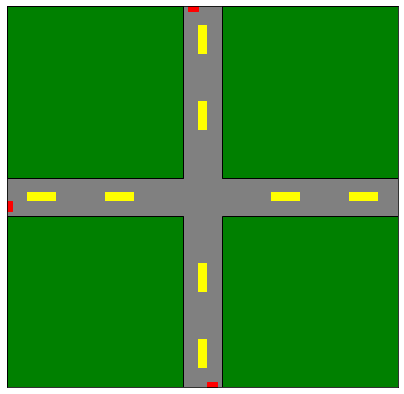

In [72]:
road = Intersection(3)
plt.figure(figsize=(7,7))
road.show()

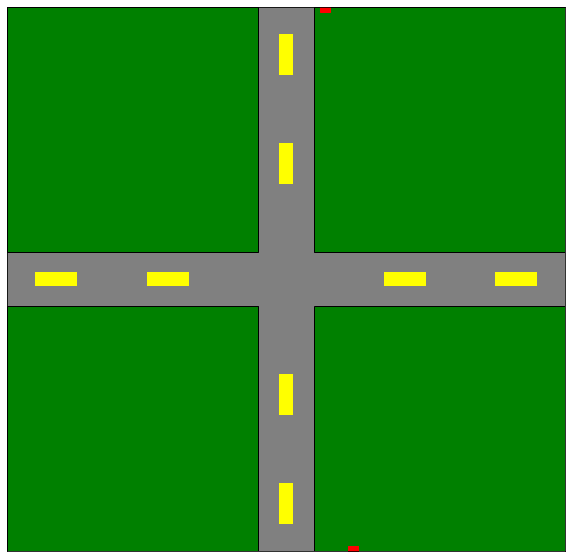

In [73]:
road = Intersection(3)
road.animate()